In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

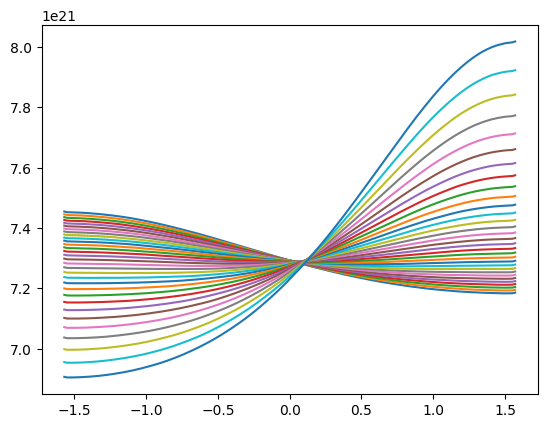

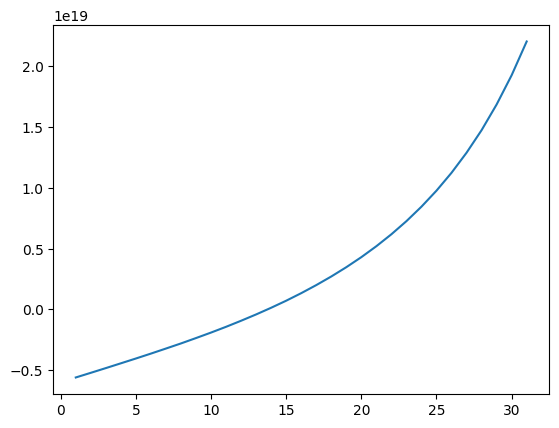

In [36]:

E = []
p = []
F = []
for k in range(0,31) :
    filename = f"normE{k+1}.csv"
    E.append(pd.read_csv(filename, header=None))
    E[k] = E[k].rename(columns={0: 'r', 1: 'z', 2: 'E'})
    E[k]['theta'] = np.arctan((E[k]['z']-k*0.001)/E[k]['r'])
    E[k] = E[k].sort_values('theta')
    E[k] = E[k][(E[k]['theta'] <= np.pi/2) & (E[k]['theta'] >= -np.pi/2)]
    p.append(E[k]['E']**2/(2*8.85e-12))
    E[k]['p'] = p[k]
    plt.plot(E[k]['theta'], E[k]['p'])
    F.append(np.trapz(0.01*np.pi*E[k]['p']*np.sin(2*E[k]['theta']), E[k]['theta']))
    E[k]['F'] = F[k]
plt.show()
plt.plot(range(1,32), F)

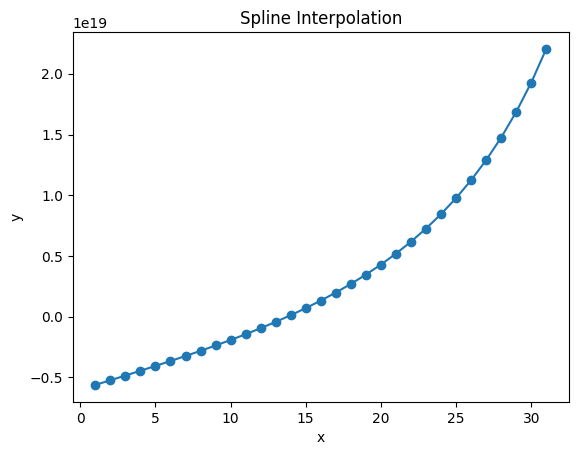

[13.77606591]


In [40]:
# Perform spline interpolation on F
spline = CubicSpline(range(1, 32), F)
import matplotlib.pyplot as plt

x = range(1, 32)
y = spline(x)

plt.plot(x, y)
plt.scatter(x, F)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spline Interpolation')
plt.show()

# Find the zero-crossing positions
zero_crossings = spline.roots()
print(zero_crossings)